Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
!pip install seglearn
!pip install tsfresh
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
import pandas as pd
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm


# names = ["cjc", "qst", "smj"]
v2_names = ["button_on", "button_off", "calling", "check", "circle", "double_tap", "fast_swipe", "finger_press", "finger_rub", "finger_slide",
        "hand_rotation", "hold", "horizontal_swipe", "palm_tilt", "pull", "push", "ranctangle", "round", "single_tap", "slow_swipe",
        "snapping_finger", "triangle"]
# PATH = 'output_old/'
PATH = 'E:/XingDong/Texadar/data/userStudy_filtered/'
names = ['gbs','lhy','ljh','lly','lyz','ysc','zsy','zzy','xxy','zjl']
gesture=['button_off','button_on','calling','check','circle','double_tap','fast_swipe','finger_press','finger_rub',
         'finger_slide','hand_rotation','hold','horizontal_swipe','palm_tilt','pull','push','rect','round',
         'single_tap','slow_swipe','snapping_finger','triangle']

x=[]
y=[]
X=[]
flag = 0
data_size = 2200
data_len = 81920
for i in range(data_size):
    x.append([])
##-------v2--------
maxlen=0
for name_idx in range(len(names)):
    for gest_idx in range(len(gesture)):
        for i in range(1,11):
            curr_file = PATH + names[name_idx] + '_'+gesture[gest_idx]+'_'+str(i) +'_filtered.txt'
            data = []
            with open(curr_file,'r') as file:
                data = np.loadtxt(file,delimiter=',')
#                 for line in file:
#                     line = line[:-2]
#                     data.append(line.split(","))
#             y.append(name_idx)
#             data = np.array(data)
        
            data = data.reshape(-1,1)
#             print(data.shape)
    #         if(maxlen<len(data)):
    #             maxlen = len(data)
    #         print(maxlen)
            for _ in range(81920):
                if(_<len(data)):
                    try:
                        x[name_idx*220+gest_idx*10+i-1].append(float(data[_]))
                    except:
                        print(names[name_idx])
                        print(gesture[gest_idx])
                        print(i)
                        print(data)
                        break
                              
                else:
                    x[name_idx*220+gest_idx*10+i-1].append(0.0)
#         flag=1
##-------v1---------
# for people in range(3):
#     for i in range(1, 11):
#         for j in range(10):
#             curr_file = PATH + names[people] + '_' + str(i) + '_' + str(j) + '_filtered.txt'
#             data = []
#             with open(curr_file,'r') as file:
#                 for line in file:
#                     line = line[:-2]
#                     data.append(line.split(","))
#             y.append(i-1)
#             data = np.array(data)
#             data = data.reshape(-1,1)
            
#             for _ in range(45040):
#                 if(_<len(data)):
#                     x[people*100+(i-1)*10+j].append(float(data[_]))
#                 else:
#                     x[people*100+(i-1)*10+j].append(0)
#             flag=1


In [12]:
print(np.array(x).shape)
print(len(x[1]))
print(x[2])

(2200, 81920)
81920
[0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 1.4648, 1.4648, 1.4648, 1.4648, 1.4648, 1.4648, 1.4648, 1.4648, 1.4648, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, -0.53516, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484, 0.46484,

In [4]:
x_sub = []
t = []
idx__ = 0
for i in range(data_size):
    x_sub.append([])
# from tsfresh import extract_features
for i in range(data_size):
    temp = x[i][:]
#     print(temp)
    for j in range(4096):
        if(i==0):
            t.append(j)
        
        x_sub[i].append(temp[j*20:j*20+20][np.argmax(np.abs(temp[j*20:j*20+20]))])
#     temp = np.array(x[0]).reshape(-1,1)
#     tempt = np.array(t).reshape(-1,1)
#     print(temp.shape)
#     print(tempt.shape)
#     res = np.append(tempt,temp,axis=1)
#     temp = np.array(x[1]).reshape(-1,1)
#     print(res.shape)
#     X = pd.DataFrame(data=res,
#                  index=[i for i in range(len(temp.tolist()))],
#                  columns=['time','v'])
#     X.insert(0, 'id', range(len(res)))
#     features = extract_features(X, column_id="id", column_sort="time")
#     #     features_filtered_direct = extract_relevant_features(res, pd.Series([1]), column_id='ID', column_sort='time')

In [ ]:
mylist = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
mylist[20:20+19]

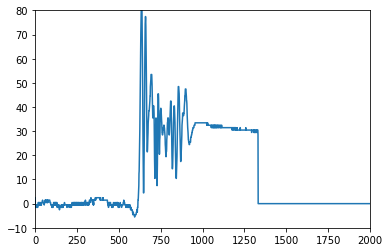

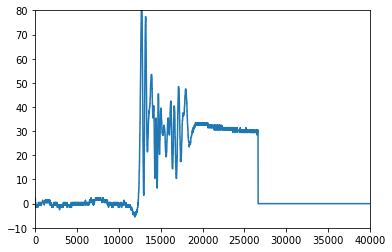

In [18]:
plt.plot(x_sub[40])
plt.axis([0,2000,-10,80])
plt.show()
plt.figure()
plt.plot(x[40])
plt.axis([0,40000,-10,80])
plt.show()

In [5]:
y = []
for i in range(10):
    for j in range(22):
        for z in range(10):
            y.append(j)
len(y)

2200

In [6]:
from tsfresh import extract_features
for i in range(data_size):
    temp = np.array(x_sub[i]).reshape(-1,1)
    tempt = np.array(t).reshape(-1,1)
    res = np.append(tempt,temp,axis=1)
#     print(res.shape)
    tempdf = pd.DataFrame(data=res,
                 index=[j for j in range(len(t)*i,len(t)*i+len(t))],
                 columns=['time','v'])
    tempdf.insert(0, 'id',[i]*len(t))
#     print(tempdf)
    if(i==0):
        X = tempdf
    else:
        X = X.append(tempdf)
# features_1000 = extract_features(X, column_id="id", column_sort="time")
    #     features_filtered_direct = extract_relevant_features(res, pd.Series([1]), column_id='ID', column_sort='time')

In [21]:
len(t)

4096

In [23]:

# print(X)
y = pd.Series(y)
print(y.shape)

(2200,)


In [24]:
X.shape

(9011200, 3)

In [32]:
from __future__ import absolute_import, division

import logging
import sys
import warnings

import pandas as pd
import six

import tsfresh

from tsfresh.feature_extraction import feature_calculators
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters
from tsfresh.utilities import dataframe_functions, profiling
from tsfresh.utilities.distribution import MapDistributor, MultiprocessingDistributor, \
    DistributorBaseClass
from tsfresh.utilities.string_manipulation import convert_to_output_format
interest = ['v__mean_abs_change', 'v__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"', 'v__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0', 'v__absolute_sum_of_changes', 'v__agg_linear_trend__f_agg_"var"__chunk_len_5__attr_"slope"', 'v__ratio_value_number_to_time_series_length', 'v__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"', 'v__agg_linear_trend__f_agg_"var"__chunk_len_10__attr_"slope"', 'v__agg_linear_trend__f_agg_"var"__chunk_len_5__attr_"intercept"', 'v__spkt_welch_density__coeff_2', 'v__ar_coefficient__k_10__coeff_1', 'v__agg_linear_trend__f_agg_"var"__chunk_len_10__attr_"rvalue"', 'v__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"stderr"', 'v__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.0', 'v__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.0', 'v__ar_coefficient__k_10__coeff_2', 'v__agg_linear_trend__f_agg_"var"__chunk_len_5__attr_"stderr"', 'v__number_cwt_peaks__n_5', 'v__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.0', 'v__agg_linear_trend__f_agg_"var"__chunk_len_10__attr_"intercept"', 'v__cid_ce__normalize_False', 'v__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0', 'v__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.0', 'v__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0', 'v__percentage_of_reoccurring_datapoints_to_all_datapoints', 'v__partial_autocorrelation__lag_4', 'v__minimum', 'v__agg_autocorrelation__f_agg_"var"__maxlag_40', 'v__autocorrelation__lag_8', 'v__agg_linear_trend__f_agg_"var"__chunk_len_5__attr_"rvalue"', 'v__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0', 'v__approximate_entropy__m_2__r_0.9', 'v__change_quantiles__f_agg_"var"__isabs_False__qh_0.2__ql_0.0', 'v__ar_coefficient__k_10__coeff_3', 'v__autocorrelation__lag_9', 'v__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.0', 'v__percentage_of_reoccurring_values_to_all_values', 'v__partial_autocorrelation__lag_5', 'v__partial_autocorrelation__lag_2', 'v__ratio_beyond_r_sigma__r_3', 'v__agg_autocorrelation__f_agg_"median"__maxlag_40', 'v__agg_linear_trend__f_agg_"var"__chunk_len_10__attr_"stderr"', 'v__autocorrelation__lag_5', 'v__augmented_dickey_fuller__attr_"teststat"', 'v__partial_autocorrelation__lag_3', 'v__augmented_dickey_fuller__attr_"pvalue"', 'v__fft_coefficient__coeff_7__attr_"abs"', 'v__approximate_entropy__m_2__r_0.1', 'v__binned_entropy__max_bins_10', 'v__approximate_entropy__m_2__r_0.5', 'v__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"slope"', 'v__approximate_entropy__m_2__r_0.3', 'v__spkt_welch_density__coeff_8', 'v__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.0', 'v__value_count__value_0', 'v__autocorrelation__lag_3', 'v__autocorrelation__lag_7', 'v__time_reversal_asymmetry_statistic__lag_3', 'v__last_location_of_maximum', 'v__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0', 'v__autocorrelation__lag_4', 'v__agg_autocorrelation__f_agg_"mean"__maxlag_40', 'v__ratio_beyond_r_sigma__r_1.5', 'v__time_reversal_asymmetry_statistic__lag_2', 'v__autocorrelation__lag_6', 'v__change_quantiles__f_agg_"var"__isabs_True__qh_0.2__ql_0.0', 'v__skewness', 'v__ratio_beyond_r_sigma__r_1', 'v__approximate_entropy__m_2__r_0.7', 'v__energy_ratio_by_chunks__num_segments_10__segment_focus_0', 'v__c3__lag_2']
d = ComprehensiveFCParameters()
kind_to_fc_parameters = tsfresh.feature_extraction.settings.from_columns(interest[:50])
kind_to_fc_parameters
import time
seconds1 = time.time()


extracted_features = extract_features(X.iloc[range(220)], column_id='id', column_sort='time',disable_progressbar=1)
seconds2 = time.time()
print("Seconds since epoch =", seconds2-seconds1)


Seconds since epoch = 1.979255199432373


In [23]:
extracted_features

variable,v__absolute_sum_of_changes,"v__agg_autocorrelation__f_agg_""mean""__maxlag_40","v__agg_autocorrelation__f_agg_""median""__maxlag_40","v__agg_autocorrelation__f_agg_""var""__maxlag_40","v__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""","v__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""rvalue""","v__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""slope""","v__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""stderr""","v__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""intercept""","v__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""rvalue""",...,v__ratio_beyond_r_sigma__r_1,v__ratio_beyond_r_sigma__r_1.5,v__ratio_beyond_r_sigma__r_3,v__ratio_value_number_to_time_series_length,v__skewness,v__spkt_welch_density__coeff_2,v__spkt_welch_density__coeff_8,v__time_reversal_asymmetry_statistic__lag_2,v__time_reversal_asymmetry_statistic__lag_3,v__value_count__value_0
id,,,,,,,,,,,,,,,,,,,,,
0,58.00032,0.604774,0.586914,0.019001,0.521239,-0.555964,-0.027607,0.009229,0.880281,-0.725826,...,0.290909,0.2,0.004545,0.036364,-0.298015,6.839033,0.017937,0.920966,1.216907,0.0


In [8]:
from tsfresh import extract_relevant_features

extracted_features = extract_features(X.iloc[range(220)], column_id='id', column_sort='time')

Feature Extraction: 100%|██████████████████████████████████████████| 1/1 [00:03<00:00,  3.62s/it]


In [26]:
extracted_features.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/extracted_features_user.csv")

In [27]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)
features_filtered = select_features(extracted_features, y)

 'v__friedrich_coefficients__m_3__r_30__coeff_1'
 'v__friedrich_coefficients__m_3__r_30__coeff_2'
 'v__friedrich_coefficients__m_3__r_30__coeff_3'
 'v__max_langevin_fixed_point__m_3__r_30'] did not have any finite values. Filling with zeros.


In [28]:
features_filtered.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/features_filtered_user.csv")

## combine

In [59]:
data1 = pd.read_csv("/home/cjc/Documents/2019Summer/Texadar/data/extracted_features_v2.csv")
data2 = pd.read_csv("/home/cjc/Documents/2019Summer/Texadar/data/extracted_features_qst.csv")
data2 = pd.DataFrame(data=data2[data2.columns[1:]],index = [i for i in range(660,880)])
data2.insert(0,'id', [i for i in range(660,880)])
dataCombined = pd.concat([data1,data2])
print(len(data1))
print(len(data2))
print(len(dataCombined))

660
220
880


In [61]:
dataCombined

,id,v__abs_energy,v__absolute_sum_of_changes,"v__agg_autocorrelation__f_agg_""mean""__maxlag_40","v__agg_autocorrelation__f_agg_""median""__maxlag_40","v__agg_autocorrelation__f_agg_""var""__maxlag_40","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,v__symmetry_looking__r_0.9,v__symmetry_looking__r_0.9500000000000001,v__time_reversal_asymmetry_statistic__lag_1,v__time_reversal_asymmetry_statistic__lag_2,v__time_reversal_asymmetry_statistic__lag_3,v__value_count__value_-1,v__value_count__value_0,v__value_count__value_1,v__variance,v__variance_larger_than_standard_deviation
0,0,86902444.0,590.0,0.962854,0.962906,0.000440,163.531971,-0.537997,-0.494953,0.035397,...,1.0,1.0,-17193.937227,-34402.149719,-51624.636572,0.0,4301.0,0.0,16136.486530,1.0
1,1,96870304.0,574.0,0.969997,0.970032,0.000287,184.658926,-0.580203,-0.555142,0.035570,...,1.0,1.0,-13699.700270,-27343.818465,-40966.899105,0.0,4198.0,0.0,17555.282916,1.0
2,2,116380635.0,647.0,0.975448,0.975494,0.000193,213.769155,-0.616950,-0.638165,0.037157,...,1.0,1.0,-12418.797755,-24912.400083,-37416.400250,0.0,4096.0,0.0,20580.302304,1.0
3,3,98721195.0,550.0,0.969970,0.970009,0.000287,186.298008,-0.580151,-0.560051,0.035889,...,1.0,1.0,-13873.467470,-27758.454148,-41654.976909,0.0,4198.0,0.0,17890.617556,1.0
4,4,98163321.0,540.0,0.970022,0.970061,0.000287,185.737507,-0.579994,-0.558324,0.035793,...,1.0,1.0,-13636.420287,-27284.187565,-41077.965051,0.0,4198.0,0.0,17789.492754,1.0
5,5,102469570.0,606.0,0.969791,0.969813,0.000291,189.970181,-0.580761,-0.571326,0.036554,...,1.0,1.0,-16426.552484,-32866.706176,-49320.431870,0.0,4198.0,0.0,18571.929367,1.0
6,6,90009248.0,597.0,0.963237,0.963272,0.000432,166.529471,-0.537932,-0.503992,0.036049,...,1.0,1.0,-17147.734359,-34233.070701,-51409.224256,0.0,4301.0,0.0,16712.929042,1.0
7,7,114646677.0,660.0,0.970160,0.970169,0.000284,200.975774,-0.580313,-0.604233,0.038704,...,1.0,1.0,-18006.351694,-36027.703473,-54106.513418,0.0,4198.0,0.0,20777.174940,1.0
8,8,84925489.0,589.0,0.963466,0.963497,0.000425,161.740110,-0.537808,-0.489478,0.035022,...,1.0,1.0,-15302.508418,-30546.257018,-45802.461410,0.0,4301.0,0.0,15769.050077,1.0
9,9,102556251.0,583.0,0.970250,0.970273,0.000282,189.621273,-0.579092,-0.569771,0.036612,...,1.0,1.0,-12954.124506,-25919.024329,-38894.712503,0.0,4198.0,0.0,18586.189803,1.0


In [60]:
print(data2)

      id  v__abs_energy  v__absolute_sum_of_changes  \
660  660            NaN                         NaN   
661  661            NaN                         NaN   
662  662            NaN                         NaN   
663  663            NaN                         NaN   
664  664            NaN                         NaN   
665  665            NaN                         NaN   
666  666            NaN                         NaN   
667  667            NaN                         NaN   
668  668            NaN                         NaN   
669  669            NaN                         NaN   
670  670            NaN                         NaN   
671  671            NaN                         NaN   
672  672            NaN                         NaN   
673  673            NaN                         NaN   
674  674            NaN                         NaN   
675  675            NaN                         NaN   
676  676            NaN                         NaN   
677  677  

In [62]:
y=[]
for i in range(22):
    for j in range(30):
        y.append(i)
for i in range(22):
    for j in range(10): 
        y.append(i)

In [63]:
y = pd.Series(y)
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
850    19
851    19
852    19
853    19
854    19
855    19
856    19
857    19
858    19
859    19
860    20
861    20
862    20
863    20
864    20
865    20
866    20
867    20
868    20
869    20
870    21
871    21
872    21
873    21
874    21
875    21
876    21
877    21
878    21
879    21
Length: 880, dtype: int64

In [64]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(dataCombined)
features_filtered = select_features(dataCombined, y)

In [ ]:
features_filtered.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/features_filtered_40.csv")

In [0]:
X.insert(0,'time',t)
X.insert(1,'value',x)
X.insert(0, 'ID', range(len(t)))
X

In [0]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [0]:
y

1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
      ...  
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68     True
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [0]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()
print(timeseries.head())
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")
extracted_features
features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')


In [0]:
features_filtered_direct

variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,"F_z__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",F_z__variance,F_x__standard_deviation,F_x__variance,F_x__ratio_value_number_to_time_series_length,T_x__standard_deviation,T_x__variance,"T_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_2__attr_""abs""",F_x__cid_ce__normalize_True,F_x__autocorrelation__lag_1,F_x__partial_autocorrelation__lag_1,T_y__percentage_of_reoccurring_values_to_all_values,"T_y__fft_coefficient__coeff_4__attr_""abs""",T_x__ratio_value_number_to_time_series_length,"F_z__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_y__fft_coefficient__coeff_0__attr_""abs""",T_y__percentage_of_reoccurring_datapoints_to_all_datapoints,"T_y__fft_coefficient__coeff_3__attr_""abs""",T_x__abs_energy,"F_x__fft_coefficient__coeff_2__attr_""abs""","T_y__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""","F_z__fft_coefficient__coeff_1__attr_""abs""","F_y__fft_coefficient__coeff_1__attr_""abs""","T_x__fft_coefficient__coeff_5__attr_""abs""","T_x__fft_coefficient__coeff_2__attr_""abs""","F_x__fft_coefficient__coeff_0__attr_""abs""","F_x__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",T_z__abs_energy,T_y__ratio_value_number_to_time_series_length,...,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6",T_z__spkt_welch_density__coeff_5,"F_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""slope""","F_x__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",T_z__minimum,T_x__approximate_entropy__m_2__r_0.5,F_x__autocorrelation__lag_2,T_y__energy_ratio_by_chunks__num_segments_10__segment_focus_3,"F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2",T_y__autocorrelation__lag_2,"T_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","F_z__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","F_x__fft_aggregated__aggtype_""centroid""","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6",T_z__energy_ratio_by_chunks__num_segments_10__segment_focus_5,"F_y__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","T_y__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",F_z__count_above_mean,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","F_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",F_x__count_below_mean,F_z__time_reversal_asymmetry_statistic__lag_2,"T_z__fft_aggregated__aggtype_""variance""",F_z__maximum,"F_z__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","T_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""",T_x__number_peaks__n_1,T_y__number_cwt_peaks__n_1,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_2","F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_5",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,0.65,1.448889,0.249444,0.062222,0.133333,0.339935,0.115556,1.338261,0.870796,5.669467,-0.081633,-0.081633,1.000000,4.165352,0.133333,61.0,13.0,1.000000,2.482534e-16,125.0,1.000000,0.21,1.033838,1.827091,1.000000,0.209057,14.0,0.09,0.0,0.133333,...,0.000000,0.000000,0.0,0.000000,0.0,0.281180,-0.010989,0.100

In [0]:
extracted_features

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""slope""",...,T_z__ratio_beyond_r_sigma__r_6,T_z__ratio_beyond_r_sigma__r_7,T_z__ratio_value_number_to_time_series_length,T_z__sample_entropy,T_z__skewness,T_z__spkt_welch_density__coeff_2,T_z__spkt_welch_density__coeff_5,T_z__spkt_welch_density__coeff_8,T_z__standard_deviation,T_z__sum_of_reoccurring_data_points,T_z__sum_of_reoccurring_values,T_z__sum_values,T_z__symmetry_looking__r_0.0,T_z__symmetry_looking__r_0.05,T_z__symmetry_looking__r_0.1,T_z__symmetry_looking__r_0.15000000000000002,T_z__symmetry_looking__r_0.2,T_z__symmetry_looking__r_0.25,T_z__symmetry_looking__r_0.30000000000000004,T_z__symmetry_looking__r_0.35000000000000003,T_z__symmetry_looking__r_0.4,T_z__symmetry_looking__r_0.45,T_z__symmetry_looking__r_0.5,T_z__symmetry_looking__r_0.55,T_z__symmetry_looking__r_0.6000000000000001,T_z__symmetry_looking__r_0.65,T_z__symmetry_looking__r_0.7000000000000001,T_z__symmetry_looking__r_0.75,T_z__symmetry_looking__r_0.8,T_z__symmetry_looking__r_0.8500000000000001,T_z__symmetry_looking__r_0.9,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_de